In [1]:
# Library for dataset upload
import pandas as pd

In [2]:
# for getting accss of gdrive file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import your dataframe
df = pd.read_csv('/content/price.csv')

In [4]:
#set date as index for graph
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format = True)

In [5]:
#library for graph
import matplotlib as mpl 
import matplotlib.pyplot as plt 

array([<Axes: xlabel='Date'>], dtype=object)

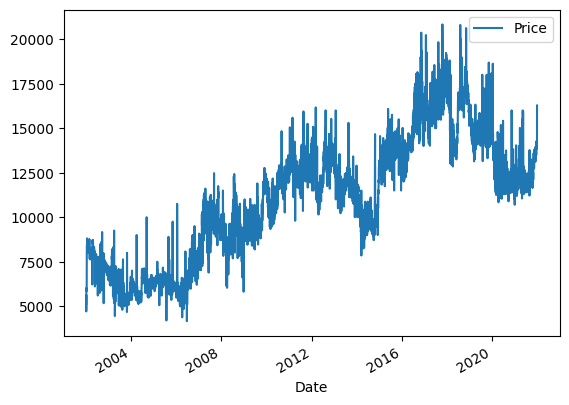

In [6]:
df.set_index('Date')[['Price']].plot(subplots = True)

In [7]:
df1= df['Price']

In [8]:
import numpy as np
df1

0        5124.0
1        5628.3
2        4710.0
3        4940.0
4        6021.7
         ...   
6758    14037.8
6759    14050.3
6760    14033.8
6761    14025.2
6762    16275.0
Name: Price, Length: 6763, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.0576645 ]
 [0.08792171]
 [0.03282515]
 ...
 [0.5922386 ]
 [0.59172262]
 [0.72670711]]


In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(5748, 1015)

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(5717, 30)
(5717,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(984, 30)
(984,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for Stacked LSTM model
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(8, input_shape=(30, 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


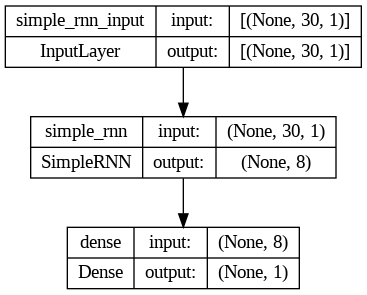

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=32,verbose=1)

Epoch 1/30
179/179 [==============================] - 6s 16ms/step - loss: 0.0187 - val_loss: 0.0051
Epoch 2/30
179/179 [==============================] - 3s 14ms/step - loss: 0.0038 - val_loss: 0.0025
Epoch 3/30
179/179 [==============================] - 3s 15ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 4/30
179/179 [==============================] - 4s 22ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/30
179/179 [==============================] - 3s 17ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 6/30
179/179 [==============================] - 3s 15ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 7/30
179/179 [==============================] - 1s 8ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 8/30
179/179 [==============================] - 1s 7ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 9/30
179/179 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 10/30
179/179 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 

In [22]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.018684,0.005067
1,0.003792,0.002454
2,0.002529,0.002247
3,0.002136,0.002639
4,0.001965,0.002320
5,0.001877,0.002220
6,0.001801,0.002234
7,0.001726,0.002289
8,0.001649,0.002115
9,0.001566,0.002168


<Axes: >

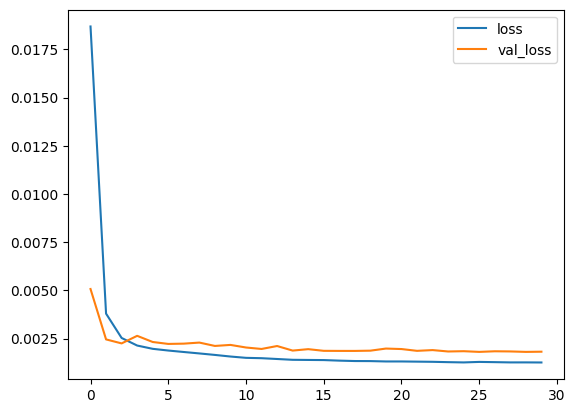

In [23]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [24]:
import tensorflow as tf

In [25]:
# prediction and check performance
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

31/31 [==============================] - 0s 3ms/step


In [26]:
# reverseTransformation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
# RMSE of train test
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11472.716027261109

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13294.857248224944

In [29]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define the actual and predicted values
y_true = y_train.tolist()
y_pred = train_predict.tolist()

# Calculate R-squared (r2score)
r2score = r2_score(y_true, y_pred)
print("R-squared (r2score):", r2score)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
# mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (r2score): -3006389355.838331
Root Mean Squared Error (RMSE): 11472.716027261109
Mean Absolute Error (MAE): 10964.09398380899


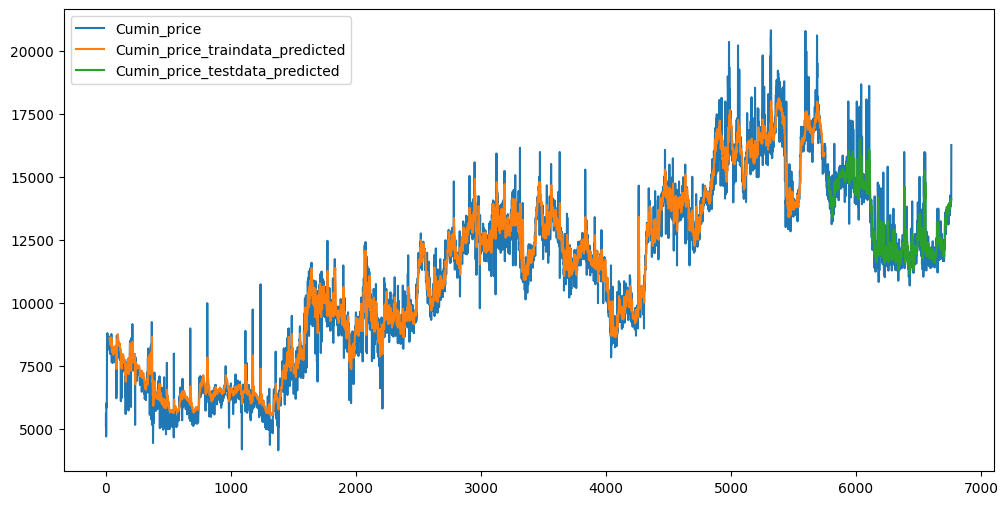

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=30
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label = 'Cumin_price')
plt.plot(trainPredictPlot, label = 'Cumin_price_traindata_predicted')
plt.plot(testPredictPlot, label = 'Cumin_price_testdata_predicted')
plt.legend()
plt.show()

In [31]:
#printing the testing predicted data
test_predict

array([[15015.561 ],
       [14885.32  ],
       [14720.232 ],
       [14682.222 ],
       [14727.161 ],
       [14891.049 ],
       [14696.828 ],
       [14495.312 ],
       [14488.463 ],
       [14442.871 ],
       [14445.207 ],
       [14428.261 ],
       [14300.96  ],
       [14209.755 ],
       [14098.159 ],
       [14161.61  ],
       [14476.604 ],
       [14371.425 ],
       [14400.323 ],
       [14276.597 ],
       [14188.524 ],
       [14120.804 ],
       [14149.812 ],
       [14011.162 ],
       [13958.082 ],
       [13824.98  ],
       [13935.907 ],
       [13843.734 ],
       [13595.286 ],
       [13502.123 ],
       [13513.286 ],
       [13572.002 ],
       [13429.677 ],
       [13472.497 ],
       [13409.15  ],
       [14049.258 ],
       [13828.721 ],
       [13809.749 ],
       [13876.405 ],
       [13909.664 ],
       [14216.122 ],
       [14222.563 ],
       [14016.532 ],
       [13881.962 ],
       [13933.619 ],
       [13977.455 ],
       [13937.878 ],
       [14060

In [32]:
len(test_data)

1015

In [33]:
x_input=test_data[985:].reshape(1,-1)
x_input.shape

(1, 30)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.566439272578913,
 0.571155149966101,
 0.5707891594818535,
 0.5631333585326782,
 0.5692052006647828,
 0.5652753028421261,
 0.5377120194874934,
 0.5844448044350847,
 0.582314859813645,
 0.5860167635641474,
 0.5815348800931176,
 0.5884107013217657,
 0.559029465233904,
 0.5810968914808216,
 0.5859087663720743,
 0.5750850477887576,
 0.5744790635443479,
 0.5694691938009612,
 0.560001439962561,
 0.5903486509350757,
 0.5886206958619077,
 0.6068482219462294,
 0.5942785487577323,
 0.5912726269117005,
 0.5805269063004362,
 0.5924785955565156,
 0.5932285760570225,
 0.5922386017963533,
 0.5917226152120046,
 0.7267071056152541]

In [35]:
# demonstrate prediction for next 30 days
from numpy import array

lstm_output=[]
n_steps=30
i=0
while(i<365):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lstm_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstm_output.extend(yhat.tolist())
        i=i+1
print(lstm_output)   

[0.64215076]
31
1 day input [0.57115515 0.57078916 0.56313336 0.5692052  0.5652753  0.53771202
 0.5844448  0.58231486 0.58601676 0.58153488 0.5884107  0.55902947
 0.58109689 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144
 0.59034865 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691
 0.5924786  0.59322858 0.5922386  0.59172262 0.72670711 0.64215076]
1 day output [[0.64011365]]
2 day input [0.57078916 0.56313336 0.5692052  0.5652753  0.53771202 0.5844448
 0.58231486 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689
 0.58590877 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865
 0.5886207  0.60684822 0.59427855 0.59127263 0.58052691 0.5924786
 0.59322858 0.5922386  0.59172262 0.72670711 0.64215076 0.64011365]
2 day output [[0.63382304]]
3 day input [0.56313336 0.5692052  0.5652753  0.53771202 0.5844448  0.58231486
 0.58601676 0.58153488 0.5884107  0.55902947 0.58109689 0.58590877
 0.57508505 0.57447906 0.56946919 0.56000144 0.59034865 0.5886207
 0.60684822 0.59427855

In [36]:
lstm_output1 = scaler.inverse_transform(lstm_output)

In [37]:
lstm_output1

array([[14865.69092695],
       [14831.73824512],
       [14726.89194244],
       [14791.75739017],
       [14960.63763416],
       [15028.13568881],
       [15066.92143956],
       [15056.51221113],
       [15072.76880724],
       [15117.2449627 ],
       [15151.31884379],
       [15172.81085065],
       [15197.02388029],
       [15220.55938619],
       [15246.05394901],
       [15272.8866709 ],
       [15297.05698277],
       [15320.24180555],
       [15344.23329884],
       [15367.89298431],
       [15391.13741329],
       [15414.10964065],
       [15436.61693969],
       [15458.89078113],
       [15480.93017155],
       [15502.58410857],
       [15524.00160769],
       [15545.14591175],
       [15565.8660184 ],
       [15586.2890875 ],
       [15606.4210797 ],
       [15626.28285714],
       [15645.85554454],
       [15665.12622722],
       [15684.09291831],
       [15702.75760468],
       [15721.13220757],
       [15739.22169416],
       [15757.02407758],
       [15774.54432502],


In [38]:
day_new1=np.arange(1,366)
day_pred1=np.arange(366,731)

In [39]:
day_raw=np.arange(1,6763)
day_train=np.arange(31,5748)
day_test=np.arange(5749,6733)
day_pred=np.arange(6764,7129)

In [40]:
import matplotlib.pyplot as plt

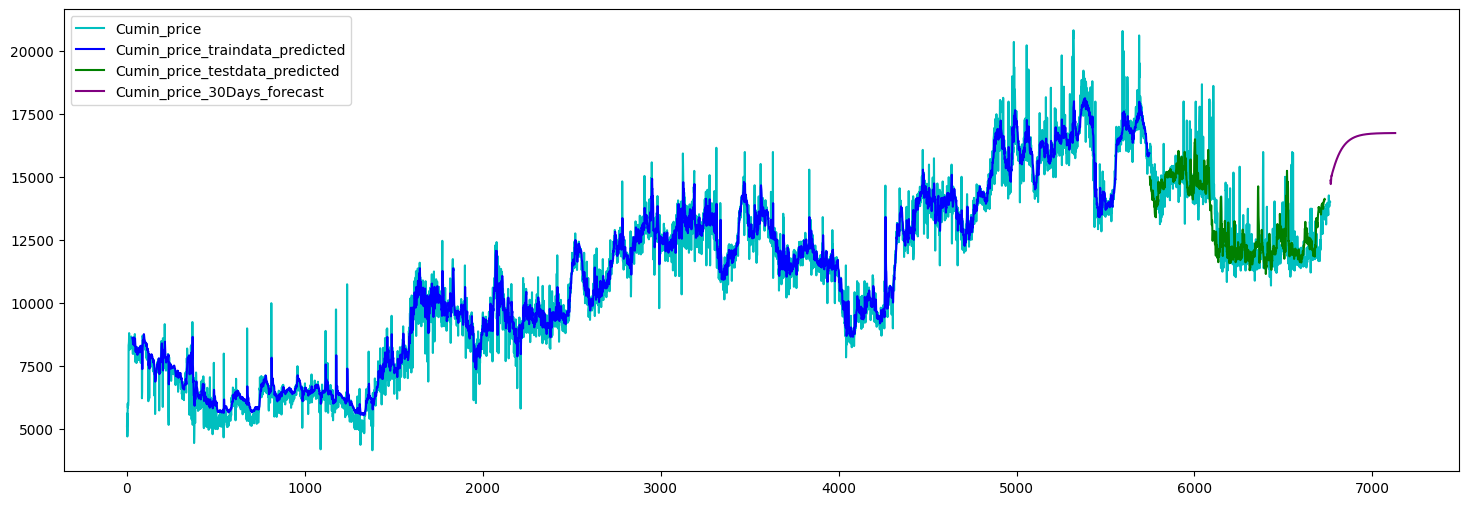

In [41]:
plt.figure(figsize=(18, 6))
plt.plot(day_raw,scaler.inverse_transform(df1[:-1]), color = 'c', label = 'Cumin_price')
plt.plot(day_train,train_predict, color = 'blue', label = 'Cumin_price_traindata_predicted')
plt.plot(day_test,test_predict, color = 'green', label = 'Cumin_price_testdata_predicted')
plt.plot(day_pred,scaler.inverse_transform(lstm_output), color = 'purple', label = 'Cumin_price_30Days_forecast')
plt.legend()
plt.show()

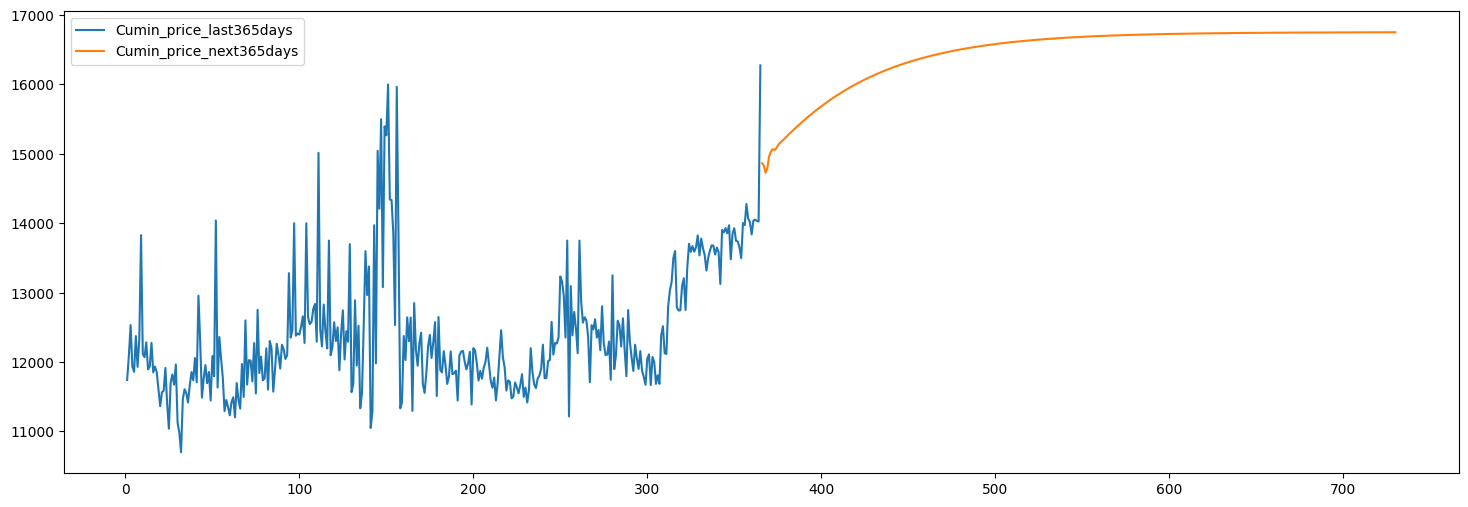

In [42]:
#plotting the graph showing forecast
plt.figure(figsize=(18, 6))
plt.plot(day_new1,scaler.inverse_transform(df1[6398:]), label = 'Cumin_price_last365days')
plt.plot(day_pred1,lstm_output1, label = 'Cumin_price_next365days')
plt.legend()
plt.show()